<br>

<br>
<br>
<br>

<br>
<h1 ><big><center>CONVEX OPTIMIZATION</center></big></h1>


<h2><big><center> HOMEWORK 3 </center></big></h2>

<h3><big><center> Bastien Batardiere </center></big></h3>








<h2><big> Question 1 </big></h2>
    
We add a variable $z \in \mathbb{R}^n$ to get an equality constraint in order to find the dual : 

$$ (P) = \min\limits_{\substack{w,z\\ z = Xw-y}} \frac{1}{2}\|z\|^2_{2} +\lambda\|w\|_1$$


Let $\nu \in \mathbb{R}^n$, the Lagrangian is then : 
$$L(w,z,\nu)= \frac{1}{2}\|z\|^2_{2} +\lambda\|w\|_1 + \nu^T(z-Xw+y)$$

Let's compute the dual function. 



$$\begin{aligned}g(\nu) = \inf_{w,z} L\left(w,z, \nu\right) 
&= \inf_{w,z} \left[\frac 12 \|z\|_2^2 + \lambda \|w\|_1 + \nu^T(z-Xw+y) \right] \\
&= \inf_z \left[ \frac 12 \|z\|_2^2 + \nu^Tz  + \inf_w(\lambda \|w\|_1 - \nu^TXw)\right] + \nu^Ty\\
&= \inf_z \left[ \frac 12 \|z\|_2^2 + \nu^Tz  -\lambda \sup_w(\frac{1}{\lambda}(X^T\nu)^Tw - \|w\|_1 )\right] + \nu^Ty\\
&= \inf_z \left[ \frac 12 \|z\|_2^2 + \nu^Tz  -\lambda f^*(\frac{1}{\lambda}X^T\nu)\right] + \nu^Ty
\end{aligned}$$ 

We donoted by $f$ the $l^1$ norm, and $f^*$ its conjugate.

We saw in exercise 2 in the homework 2 that : 
$$f^*(y) = \sup_x \langle x,y\rangle -\|x\|_{1}=\begin{aligned} 
&= \begin{cases} 0 &\text{if} \quad \|y\|_{\infty} \leq 1\\
-\infty &\text{otherwise}
\end{cases}
\end{aligned}$$ 

Thus : 
$$\begin{aligned} g(\nu) = 
&= \begin{cases}\inf_z \left[ \frac 12 \|z\|_2^2 + \nu^Tz \right] + \nu^Ty &\text{if} \quad \|X^T\nu\|_{\infty} \leq \lambda \\
-\infty &\text{otherwise}
\end{cases}
\end{aligned}$$ 

Now, since $ \phi : z \mapsto \frac 12 \|z\|^2 + \langle z, \nu \rangle $ is convex and differentiable , we compute its gradient and find a critical point to get the minimum $z^*$. 

$$\nabla_{\phi} = z+\nu = 0 \Leftrightarrow z^*=-\nu$$  

$$\phi(z^*) = - \frac 12 \|\nu\|^2_2$$

Then, 

$$\begin{aligned}g(\nu)
&= \begin{cases} -\frac 12 \|\nu\|_2^2 + \nu^Ty &\text{if} \quad \|X^T\nu\|_{\infty} \leq \lambda \\
-\infty &\text{otherwise}
\end{cases}
\end{aligned}$$ 

The dual problem is : 

$$(D)= \max\limits_{\substack{\nu \\ \|X^T\nu\|_{\infty}\leq \lambda}} -\frac{1}{2}\|\nu\|^2_{2} +\langle \nu,y\rangle $$


But $\|X^T\nu\|_{\infty}\leq \lambda \Leftrightarrow X^T\nu \leq \lambda\mathbf 1_{d}, -X^T\nu \geq \lambda\mathbf 1_{d} \Leftrightarrow \begin{pmatrix}X^T\\ -X^T\end{pmatrix} \nu \leq \lambda\mathbf 1_{2d} $

The dual problem becomes, by switching the sign to get an infimum : 


$$(D) = - \min\limits_{\substack{\nu \\ \begin{pmatrix}X^T \\ -X^T \end{pmatrix} \nu \leq \lambda \mathbf 1_{2d}}} \frac 12 \nu^T\nu  - \langle y, \nu \rangle $$


This is the canonical form wanted with $ Q = \frac 12 I_n$, $p= -y$ , $A = \begin{pmatrix}X^T \\ -X^T \end{pmatrix}$ and $ b = \lambda \mathbf 1_{2d} $ 

<h2><big> Question 2 </big></h2>

On rappelle que la fonction à minimiser dans le problème dual est bien convexe. 

Pour la methode de Newton, il nous faut donc calculer le gradient et la hessienne de la fonction à minimiser et de la log barrier function. 

Soit $t \in \mathbb{R}^{*+}$

On note $A_i$ la $i$-eme ligne de $A$.  

On regarde $$\Psi : v \mapsto t(v^TQv+p^T) - \sum_{i = 1}^{2d}\log(b_i-A_iv)$$

Alors, 
$$\nabla \Psi (v) = t((Q+Q^T)v+p)  + \sum_{i = 1}^{2d}\frac{A_i^T}{b_i-A_iv}$$

Et la hessienne vaut : 

$$H_{\Psi} (v) = t(Q+Q^T)  + \sum_{i = 1}^{2d}\frac{A_iA_i^T}{b_i-A_iv}$$




In [357]:
import numpy as np 
import matplotlib.pyplot as plt 
import time 



#log barrier function vectorise
def phi_vect(nu,b,A): 
    if np.min(b-np.dot(A,nu))<0 : # on met une grande valeur en dehors du domaine du log 
        return 1e20 
    nu = nu.reshape(-1,1)# on reshape pour faire le produit scalaire, mais pas forcement necessaire ici
    b=b.reshape(-1,1)
    f_i_stacked = b-np.dot(A,nu)
    return -np.sum(np.log(f_i_stacked))

#fonction f_0, cele qu'on cherche a minimiser dans le dual 
def f_0(nu,Q,p):
    return nu.T@np.dot(Q,nu)+np.dot(p.T,nu)
    
#big_psi correspond juste a la somme de la log barrier et de la fonction f_0
def big_psi(t,nu,b,A,Q,p): 
    return t*f_0(nu,Q,p)+phi_vect(nu,b,A)


# gradient de la fonction big_psi cf formule 
def grad(t,nu,b,A,Q,p): 
    grad_f_0 = np.dot((Q+Q.T),nu)+p # gradien de f_0
    grad_psi = np.sum(A/(b-np.dot(A,nu)).reshape(-1,1),axis = 0) # gradien de la log barrier 
    return grad_psi + t*grad_f_0 # on somme simplement les deux en multipliant la derivee de la log barrier par t 

# hessienne de la fonction big_psi cf formule 
def hess(nu,b,A,Q,t): 
    hess_psi_i = [np.outer(A[i,:],A[i,:])/(b[i]-A[i,:].dot(nu))**2 for i in range(A.shape[0])]
    return t*(Q+Q.T)+np.sum(hess_psi_i, axis = 0)


# calcul de l'inverse de la hessienne et de l'increment delta_nu_nt du newton step
def Newton_step(t,nu,b,A,Q,p) : 
    hess_nu = hess(nu,b,A,Q,t)
    grad_nu = grad(t,nu,b,A,Q,p)
    delta_nu_nt = np.linalg.solve(hess_nu,-grad_nu) # l'increment correspond a  moins l'inverse de la hessienne multiplie par le gradient 
    return delta_nu_nt, grad_nu, hess_nu # on retourne toutes les valeurs pour eviter de recalculer les hessiennes dans la boucle 


# CALCUL DU CRITERE DU NEWTON STEP 
def lam(delta_nu_nt,gradient, hessienne ): 
    return delta_nu_nt@hessienne@delta_nu_nt
    
# BACKLINE SEARCH 
def line_search( t, nu, b, A, Q, p, beta, delta_nu_nt, alpha):  # begin_step correspond au point de depart du step. 
    gradient = grad(t,nu,b,A,Q,p)
    step = 1
    for k in range (200) : # boucle for pour eviter les boucles infinies 
        if big_psi(t,nu+step*delta_nu_nt,b,A,Q,p)  <= big_psi(t,nu,b,A,Q,p) + alpha*step*np.inner(gradient, delta_nu_nt)  : 
            # on a mis inferieur ou egal dans cette condition, sinon il peut arriver que les deux soient egaux pour la precision machine et on ne sort pas de la boucle
            return step 
        step = step * beta # on update le step 
    print(' pas de convergence dans le ligne_search')
    return step

<h4><big> Centering step </big></h4>

In [361]:
#CENTERING STEP 
def centering_step(Q,p,A,b,t,v1,alpha = 0.1, beta=0.7,eps = 1e-7): 
    
    iterates = []       # liste des iterations du centering step 
    crit_iterates = []
    i=0
    while True and i <500: # on met une condition pour eviter les boucles infinies, normalement il n'y en a pas 
        delta_nu_nt, grad_nu,hess_nu = Newton_step(t,v1,b,A,Q,p)   # on stock les parametres du newton step
        criterion = lam(delta_nu_nt,grad_nu,hess_nu)/2 # on calcule le critere 
        crit_iterates.append(criterion)
        if criterion < eps:
            return iterates, crit_iterates
        step = line_search( t, v1, b, A, Q, p, beta, delta_nu_nt, alpha) # on calcule le step avec le backline seaarch 
        v1 = v1 + step*delta_nu_nt                # on update v1 
        iterates.append(v1)                       # on ajoute v1 dans la suite d'iterations 
        i +=1
    print("erreur : il n'y a pas eu convergence dans le centering_step ")
    return iterates
    




<h4><big> Barrier method </big></h4>

In [364]:
# BARR_METHOD
def barr_method(Q,p,A,b,v0,alpha = 0.25, beta=0.9,eps = 1e-7, mu = 50): # j'ai rajoute l'hyper parametre begin_step 
    if np.min(b-np.dot(A,v0))<0: # on ne peut pas commencer l'algorithme 
        print('INFEASIBLE STARTING POINT')
        return 0 
    
    t = 1                        # le premier point t_0 doit etre positif strictement, j'ai choisi 1, cela ne change pas grand chose
    m = A.shape[0]               # le nombre de contraintes, qui sert a calculer le precision criteria
    full_crit_iterates = []
    centering_seq, crit_iterate = centering_step(Q,p,A,b,t,v0, eps =eps,alpha = alpha  , beta = beta) # on fait une premiere fois le centering_step, on aurait aussi pu le faire dans la boucle ! 
    v0 = centering_seq[-1]              # on reprend le centering_step du meilleur point connu 
    full_crit_iterates.append(crit_iterate)
    t*=mu                       # on actualise t 
    iterates = []               # liste qui va contenir tous les derniers points du centering_step 
    iterates.append(v0)         # on stock le meilleur point 
    center = []                 # liste qui va contenir chaque iteration de chaque centering_step 
    center.append(centering_seq)        # on stock 
    while True : 
        if m/t < eps :          # precision criteria 
            return iterates, center, full_crit_iterates               # on retourne les trois listes 
        centering_seq, crit_iterate = centering_step(Q, p, A, b, t, v0, eps= eps , alpha = alpha , beta= beta ) # centering_step 
        full_crit_iterates.append(crit_iterate)
        iterates.append(centering_seq[-1])      # on ajoute le meilleur point du centering step 
        center.append(centering_seq)            # on ajoute les iterations du centering step 
        v0 = centering_seq[-1]                  # on actualise v0 pour repartir du meilleur point connu 
        t*=mu                                   # on actualise t 
        

# fonction pour afficher une solution         
def affichage_solution(center_seq): 
    compteur = 0
    for i in range( len(center_seq)): 
        compteur += len(center_seq[i])
    print("L'algorithme a convegé en ", len(center_seq), " iterations de barrier_method, et ", compteur," Newton iterations")
    print("Le minimum est atteint pour v = ", center_seq[-1][-1])
    print("La valeur minimale est de : ", f_0(v_seq[-1],Q,p))


J'observe qu'il y a un problème dans la fonction line_search. En effet, si on cherche une précision plus grande que $eps=1e-7$, alors le line_search ne s'arrete pas et boucle. Après avoir observé les résultats, il s'avere que mon approximation ( au point $\nu$) et ma valeur réelle sont égales quand t est trop grand ( c'est pour cela que le problème intervient quand on cherche une précision trop grande). Peut-être la précision machine me fait erreur, car l'égalité intervint à 16 digits exactement. J'ai essayé de regarder la différence des deux, sans résultat. Une solution artificielle serait de forcer la précision dans le centering_step à être au plus 1e-7, sans forcer la précision de la barrier_method. 

<h2><big> Question 3 </big></h2>

In [367]:
#SIMULATION DES VARIABLES 
#np.random.seed(0)
n = 10
d=50
X=np.random.randn(n,d)                 # on tire des normales 
y = 5*np.random.randn(n)
lamb = 10                              # parametre lambda dans l'enonce 
b = lamb * np.full(2*d,1)
A = np.stack((X.T,-X.T),axis = 0)      # on stack X.T et -X.T
A= A.reshape(2*d,n)                    # on reshape pour avoir la bonne taille 
Q= 1/2*np.eye(n)                       # on prend la matrice Q du sujet 
p = -y                                 # p= -y dans le dual cf correspondance avec la forme canonique question 1  

v0 = np.zeros(n)# on prend v0=0 pour avoir un feasible point 


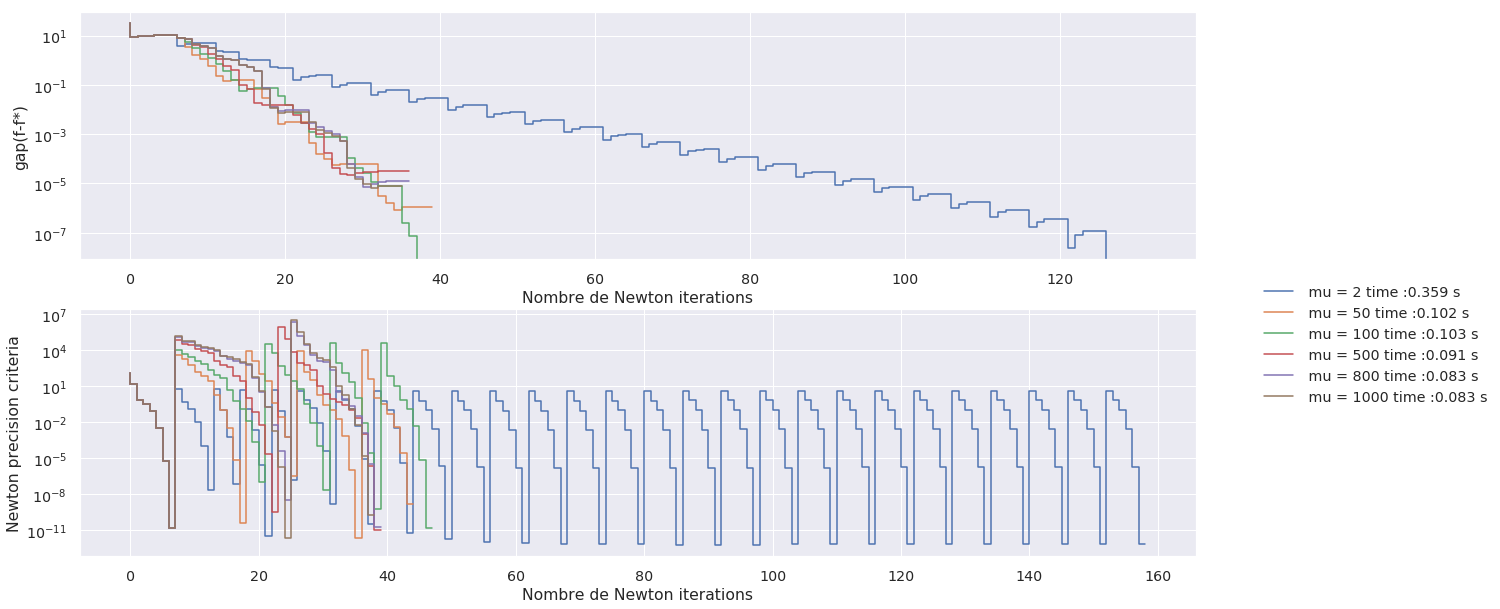

In [368]:
v_seq,center_seq , crit_seq = barr_method(Q,p,A,b,v0,alpha = 0.25, beta=0.7,eps = 1e-6, mu = 2)
f_star = f_0(v_seq[-1],Q,p) # valeur de reference pour f*


#INITIALISATION DES GRAPHES 
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

# TRACAGE DES COURBES 
MU = [2,50,100,500,800,1000] # les differentes valeurs de mu 
for mu in MU : 
    tps = time.process_time()
    v_seq_mu,center_seq_mu,crit_seq_mu  = barr_method(Q,p,A,b,v0,alpha = 0.25, beta=0.7,eps = 1e-6, mu=mu) # valeurs trouvees pour ce mu 
    tps= time.process_time() -tps
    round_tps = round(tps,3) # temps pris par l'algorithme 
    
    # CALCUL DE LA LONGUEUR DE L OUTPUT CENTER SEQ 
    compteur = 0
    for i in range( len(center_seq_mu)): 
        compteur += len(center_seq_mu[i])
        
    # EXTRACTION DE CHAQUE VALEUR DE f_0(v)-f* POUR CHAQUE V DANS LA LISTE ( OUTPUT)
    full_seq_gap_mu =[]
    for elmt in center_seq_mu : 
        for v in elmt : 
            full_seq_gap_mu.append(f_0(v,Q,p)-f_star)
    abscisse = np.arange(compteur)
    ax1.step(abscisse, full_seq_gap_mu, label = ' mu = '+str(mu) +' time :'+str(round_tps) + ' s') # on trace la courbe 
    
    
    # EXTRACTION DE CHAQUE PRECISION CRITERIA DANS L OUTPUT 
    full_seq_precision_mu = [] 
    for elmt in crit_seq_mu :
        for precision in elmt : 
            full_seq_precision_mu.append(precision)
            
    abscisse2 = np.arange(len(full_seq_precision_mu))     
    ax2.step(abscisse2 ,full_seq_precision_mu, label = ' mu = '+str(mu) +' time :'+str(round_tps) + ' s') # on trace la courbe 
    

# parametres des deux axes, comme l'echelle logaritmique et les legendes,titres 
ax1.set_yscale('log')
ax1.set_xlabel('Nombre de Newton iterations')
ax1.set_ylabel('gap(f-f*)')
ax2.set_yscale('log')
ax2.set_ylabel('Newton precision criteria')
ax2.set_xlabel('Nombre de Newton iterations')
ax2.legend(bbox_to_anchor=(1.05, 1.15))

On remarque que plus $\mu$ est petit, plus le nombre d'iterations de Newton est grand. Ceci est compréhensible car on fait beaucoup plus de fois la boucle dans la barrier method car on atteint la précision au bout de plus d'itérations. 

Dans le cas contraire, si $\mu$ est grand, on converge en moins d'iterations. On ne peut pas juger le modèle sur le simple nombre d'itérations de Newton, car elles peuvent prendre plus ou moins de temps en fonction du paramêtre. 

Un bon critère est le temps d'éxécution, où le paramêtre $\mu=800$ semble être le plus rapide.

<h4><big> Recuperation de w </big></h4>

Soit $\nu^*$ une solution du problème dual. On va retrouver $w^*$ une solution du primal.

La dualité forte étant de mise, on peut utiliser le théorème KKT, $\nu^*$ doit annuler le gradient du Lagrangien par rapport à $z$ ( En réalité les fonctions du lagrangien doivent être dérivable par rapport à $z$ et $w$, mais ici le lagrangien n'est pas différentiable par apport à $w$. J'admets qu'on peut quand même utiliser les conditions du premier ordre sur $z$.)


Annulons le lagrangien par rapport à $z$ : 

$$\nabla_z L(z,w,\nu) = z+ \nu =0 \Leftrightarrow z = -\nu \Leftrightarrow Xw-y = -\nu \Leftrightarrow Xw = y-\nu $$

Maintenant, en supposat que $X$  est de rang plein, on peut utiliser son inverse généralisée ( ce qui est tres probablement le cas si X est tiré aléatoirement et $d>>n$) 

On a donc : 

$$ w^*= (X^TX)^{-1}X^T(y-\nu^*)$$



Text(0, 0.5, 'difference en norme avec la reference w_ref')

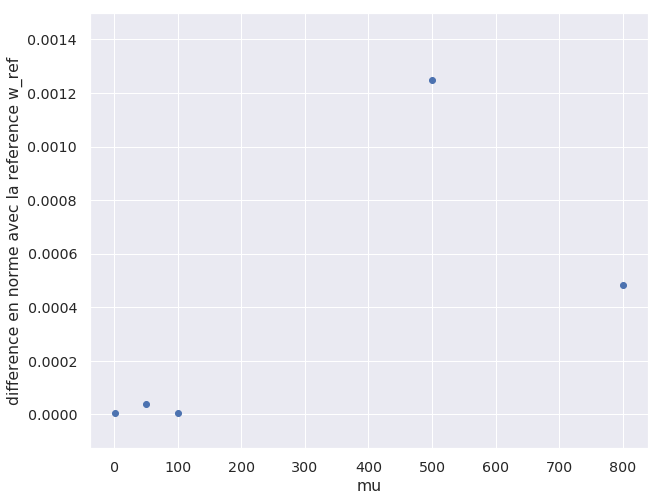

In [363]:
MU = [2,50,100,500,800] # les differentes valeurs de mu 
W = []                  # liste qui va contenir les differentes valeurs de w 

v_seq_ref,_,_ = barr_method(Q,p,A,b,v0,alpha = 0.25, beta=0.9,eps = 1e-7, mu = 75)
w_ref = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y- v_seq_ref[-1] )            # valeur de reference 

v0 = np.zeros(n)
# remplissage de W 
for mu in MU:
    v_seq,_,_ = barr_method(Q,p,A,b,v0,alpha = 0.25, beta=0.9,eps = 1e-6, mu = mu)
    w_best_mu  = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y-v_seq[-1])
    W.append(np.linalg.norm(w_best_mu-w_ref))

# tracage des points
fig = plt.figure(figsize = (10,8))
plt.scatter(MU,W)
plt.ylim(-0.1*np.max(W),1.2*np.max(W))
plt.xlabel('mu')
plt.ylabel('difference en norme avec la reference w_ref')

On remarque que le résultat ne varie pas enormement en fonction de $\mu$. 